In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [11]:
df = pd.read_csv('crop_yield_dataset/yield_df.csv')

In [12]:
df.rename(columns={"hg/ha_yield":"yield","Item":"crop"}, inplace=True)
df["yield"] = df["yield"].astype("float64")
df["average_rain_fall_mm_per_year"] = df["average_rain_fall_mm_per_year"].astype("float64")
df.drop("Unnamed: 0", axis=1,inplace=True)

Performing Boxcox Transformation on pesticides_tonnes to make it closer to normal

In [13]:
from scipy.stats import boxcox
boxcox(df["pesticides_tonnes"])
df["avg_boxcox"], param = boxcox(df["pesticides_tonnes"])
df["avg_boxcox"].skew()

-0.14159023174563246

In [14]:
df["pesticides_tonnes"] = df["avg_boxcox"]
df.drop(columns=["avg_boxcox"], inplace=True)

In [15]:
#encoding and standardization
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()
df["Area"] = label_en.fit_transform(df["Area"])
df["crop"] = label_en.fit_transform(df["crop"])

In [16]:
X = df.drop('yield', axis=1)
y = df['yield']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [20]:
model = {
    'lr' : LinearRegression(),
    "lss" : Lasso(),
    'rg' : Ridge(),
    'knr' : KNeighborsRegressor(),
    'dtr' : DecisionTreeRegressor(),
    "rf" : RandomForestRegressor(),
    "gb" : GradientBoostingRegressor(),
    "xgb" : XGBRegressor()
}

for name, mod in model.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    print(f"{name} MSE : {np.sqrt(mean_squared_error(y_test, y_pred))} Score {r2_score(y_test,y_pred)}")

lr MSE : 80852.08620158913 Score 0.0987930155367368
lss MSE : 80852.08927876758 Score 0.09879294693801821
rg MSE : 80852.08653473409 Score 0.09879300811002534
knr MSE : 55110.052705691895 Score 0.5812992479639465
dtr MSE : 12987.279284890905 Score 0.9767470291045384
rf MSE : 10127.840799325502 Score 0.9858591400785047
gb MSE : 34773.822585474634 Score 0.833295640875001
xgb MSE : 13451.947664464684 Score 0.975053338957936


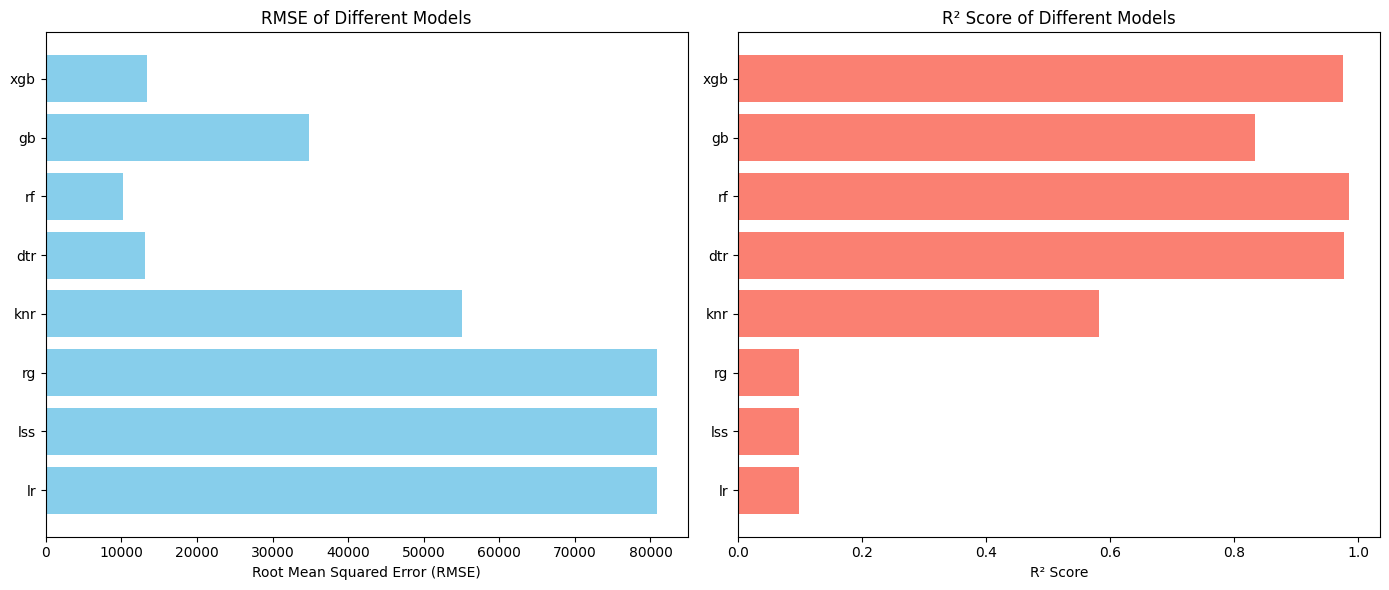

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
model_performance = {
    "Model": [],
    "RMSE": [],
    "R² Score": []
}
for name, mod in model.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    model_performance["Model"].append(name)
    model_performance["RMSE"].append(rmse)
    model_performance["R² Score"].append(r2)
performance_df = pd.DataFrame(model_performance)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# RMSE Bar Plot
axes[0].barh(performance_df["Model"], performance_df["RMSE"], color="skyblue")
axes[0].set_title("RMSE of Different Models")
axes[0].set_xlabel("Root Mean Squared Error (RMSE)")

# R² Score Bar Plot
axes[1].barh(performance_df["Model"], performance_df["R² Score"], color="salmon")
axes[1].set_title("R² Score of Different Models")
axes[1].set_xlabel("R² Score")

plt.tight_layout()
plt.show()